### Importando Bibliotecas

In [250]:
import pandas as pd
import numpy as np
import imageio
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import plotly.graph_objects as go
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.sandbox.regression.predstd import wls_prediction_std

### Carregando a Base de Dados

In [200]:
data = pd.read_excel('Reg_Linear.xlsx')
pd.concat([data.head(), data.tail()])

,Industry Segment,Calendar Year/Month,Net Sales,Net Orders,Customer Potential,Customer Target
0,Automotive,JAN 2022,5607559.87,4903954.57,1.257960e+07,5.602794e+06
1,Automotive,FEB 2022,3979663.88,4805091.16,1.257960e+07,5.602794e+06
2,Automotive,MAR 2022,6532058.84,5738798.39,1.257960e+07,5.602794e+06
3,Automotive,APR 2022,3745516.30,3743791.15,1.257960e+07,5.602794e+06
4,Automotive,MAY 2022,4810833.68,5753273.61,1.257960e+07,5.602794e+06
30,Automotive,JUL 2024,6082514.76,4912746.59,1.615256e+07,6.204207e+06
31,Automotive,AUG 2024,6455203.02,7727904.20,1.615256e+07,6.204207e+06
32,Automotive,SEP 2024,6446105.83,6653337.15,1.615256e+07,6.204207e+06
33,Automotive,OCT 2024,7524347.16,8061422.26,1.615256e+07,6.204207e+06
34,Automotive,NOV 2024,2115554.81,1937834.15,1.615256e+07,6.204207e+06


### Filtrando a base de dados somente com as nossas Variáveis Preditoras e a Preditiva

In [201]:
data = data[['Net Sales', 'Net Orders','Customer Potential','Customer Target']]
pd.concat([data.head(), data.tail()])

,Net Sales,Net Orders,Customer Potential,Customer Target
0,5607559.87,4903954.57,1.257960e+07,5.602794e+06
1,3979663.88,4805091.16,1.257960e+07,5.602794e+06
2,6532058.84,5738798.39,1.257960e+07,5.602794e+06
3,3745516.30,3743791.15,1.257960e+07,5.602794e+06
4,4810833.68,5753273.61,1.257960e+07,5.602794e+06
30,6082514.76,4912746.59,1.615256e+07,6.204207e+06
31,6455203.02,7727904.20,1.615256e+07,6.204207e+06
32,6446105.83,6653337.15,1.615256e+07,6.204207e+06
33,7524347.16,8061422.26,1.615256e+07,6.204207e+06
34,2115554.81,1937834.15,1.615256e+07,6.204207e+06


### Matriz de Correlação de Pearson

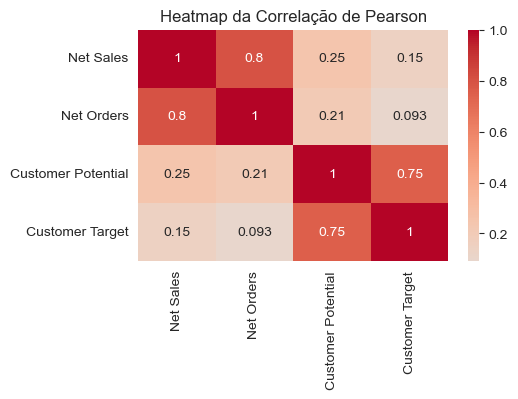

In [202]:
correl_pearson = data.corr(method='pearson')

# Define o tamanho da figura
plt.figure(figsize=(5, 3))

# Cria o heatmap
sns.heatmap(correl_pearson, annot=True, cmap='coolwarm', center=0)

# Configurações adicionais
plt.title('Heatmap da Correlação de Pearson')
plt.show()

Net Sales e Net Orders têm uma correlação alta (0.8), indicando que conforme as vendas líquidas aumentam, os pedidos líquidos também tendem a crescer.

Customer Potential e Customer Target possuem uma correlação forte (0.75), sugerindo que a meta do cliente está fortemente ligada ao seu potencial.

As demais correlações são mais baixas, indicando relações mais fracas entre essas variáveis.

# Estimando um modelo de Regressão Linear Múltipla

## Nosso modelo:

### Net_Sales (Chapéu) = α​ + β 1​⋅Net_Orders + β 2​⋅Customer_Potential + β 3​⋅Customer_Target

#### Porque utilizar direto o Y(Chapéu), que no nosso caso é Net_Sales(Chapéu)?

#####  Pois já usaremos os valores ajustados diretamente, sem calcular explicitamente os resíduos.

##### Resíduo = Y - Y(Chapéu)

In [203]:
# Substituir espaços nos nomes das colunas para evitar erros
data.columns = data.columns.str.replace(" ", "_")

# Estimando o modelo de regressão múltipla
modelo = sm.OLS.from_formula("Net_Sales ~ Net_Orders + Customer_Potential + Customer_Target", data).fit()

# Exibir resumo do modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:              Net_Sales   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     19.44
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           2.81e-07
Time:                        16:47:23   Log-Likelihood:                -514.92
No. Observations:                  35   AIC:                             1038.
Df Residuals:                      31   BIC:                             1044.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           3.826e+05   1.73

# Temos já um modelo

C:\Users\NOTE MATHEUS\AppData\Local\Temp\ipykernel_16712\1963668541.py:1: DeprecationWarning:

Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.



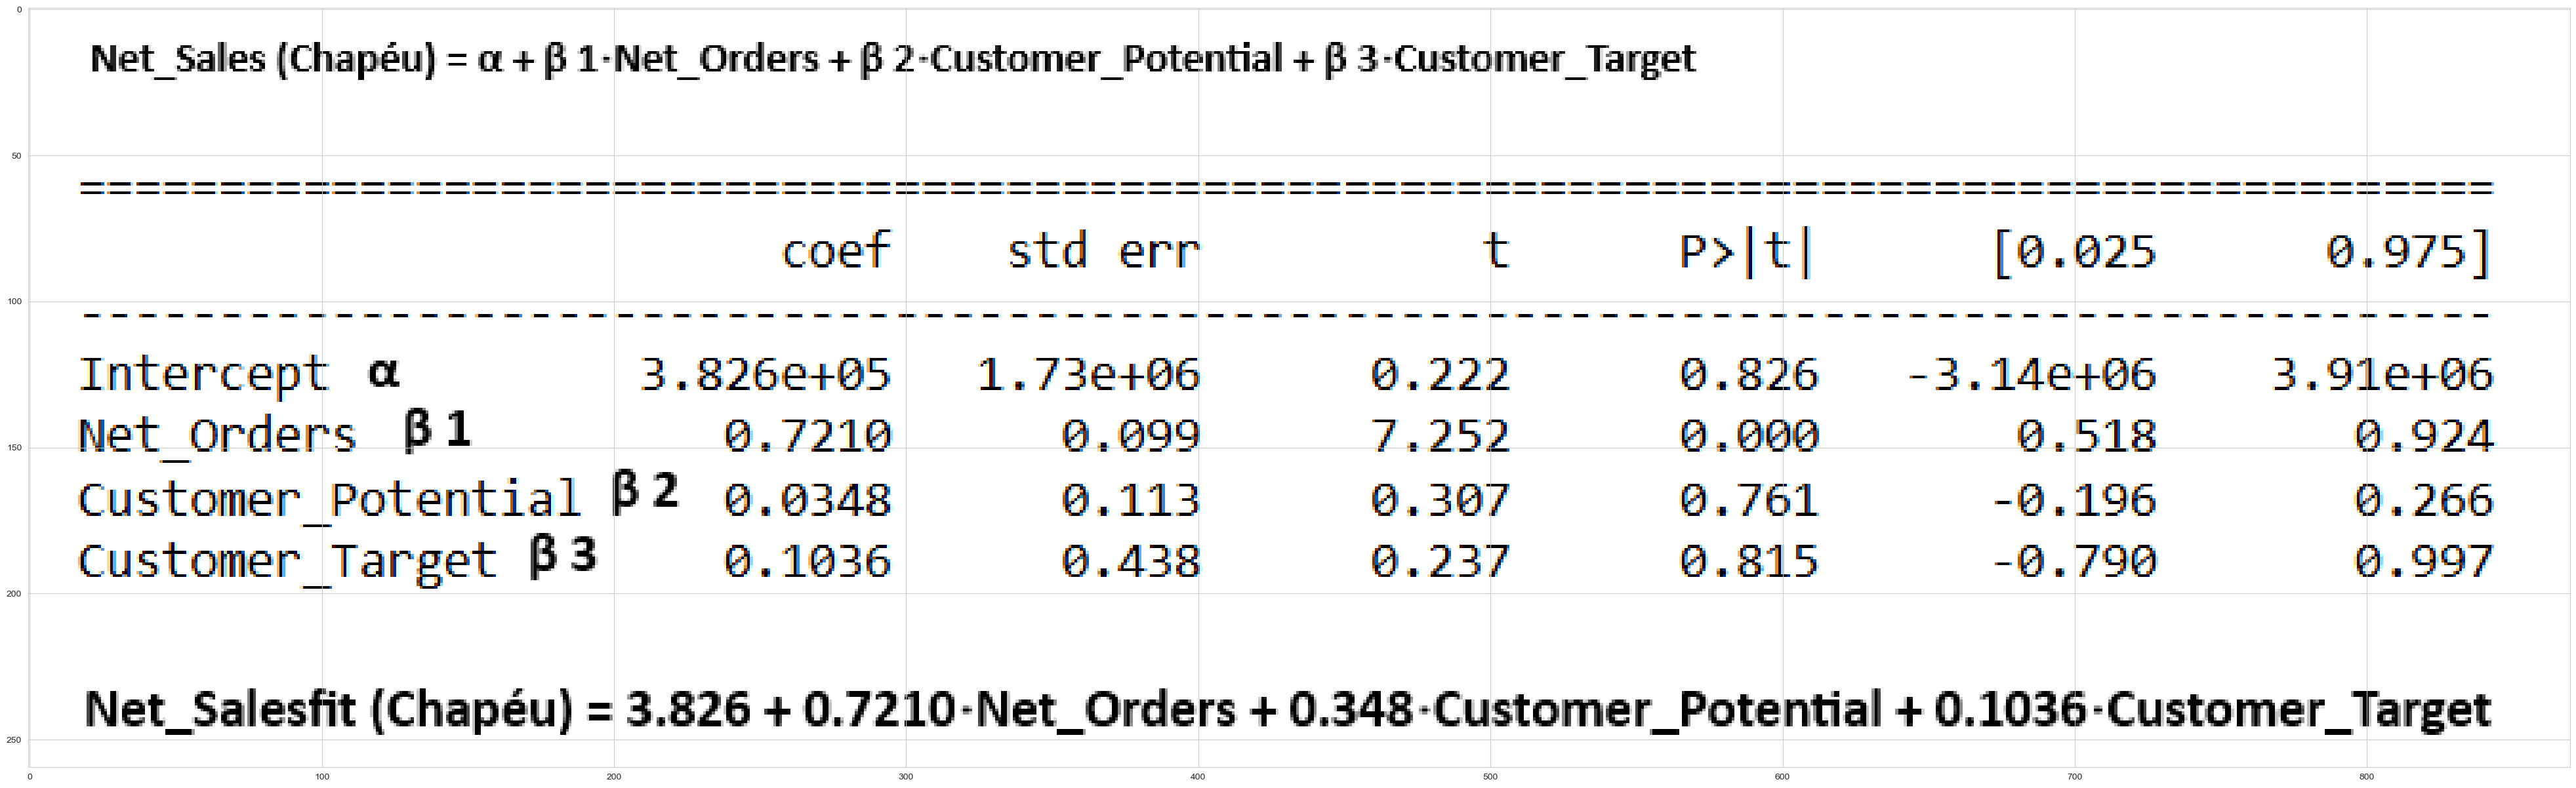

In [204]:
imagem1 = imageio.imread('imagem1.png')
plt.figure(figsize=(50, 50))
plt.imshow(imagem1)
plt.show()

# Interpretações do nosso Modelo



#### 1. R-squared (R²): 0.653

O modelo explica 65,3% da variabilidade da variável dependente (Net_Sales). Isso indica um ajuste razoável, mas ainda há uma parcela significativa da variabilidade que não é explicada pelas variáveis independentes incluídas no modelo.

#### 2. Adj. R-squared (R² ajustado): 0.619

O R² ajustado leva em conta o número de variáveis independentes no modelo. Como ele é próximo ao R², sugere que as variáveis incluídas são relevantes, mas não excessivas.

Mas este parãmetro não é importante no nosso caso pois não estamos comparando modelos (modelos diferentes com quantidades de parãmetros Beta diferentes)

#### 3. F-statistic: 19.44 e Prob (F-statistic): 2.81e-07

O teste F verifica a significância geral do modelo. Um valor-p muito baixo (próximo de zero) indica que o modelo como um todo é estatisticamente significativo, ou seja, pelo menos uma das variáveis independentes tem um efeito significativo sobre Net_Sales.

## Coeficientes Estimados:

#### 1. Intercept (Intercepto): 3.826e+05

O valor do intercepto não é estatisticamente significativo (valor-p = 0.826), o que significa que, quando todas as variáveis independentes são zero, o valor esperado de Net_Sales não é significativamente diferente de zero.

#### 2. Net Orders: 0.7210

O coeficiente de Net_Orders é 0.7210, com um valor-p muito baixo (0.000), indicando que essa variável é altamente significativa. Para cada aumento unitário em Net_Orders, Net_Sales aumenta em 0.7210 unidades, mantendo as outras variáveis constantes.

#### 3. Customer Potential: 0.0348

O coeficiente de Customer_Potential é 0.0348, mas não é estatisticamente significativo (valor-p = 0.761). Isso sugere que Customer_Potential não tem um impacto significativo sobre Net_Sales no nosso modelo atual.

#### 4. Customer Target: 0.1036

O coeficiente de Customer_Target é 0.1036, mas também não é estatisticamente significativo (valor-p = 0.815). Assim como Customer_Potential, essa variável não parece influenciar Net_Sales de forma significativa.

## Diagnósticos do Modelo:

#### 1. Multicolinearidade:

O Condition Number (Número de Condição) é muito alto (2.63e+08), o que pode indicar problemas de multicolinearidade. Isso significa que as variáveis independentes podem estar altamente correlacionadas entre si, o que pode afetar a confiabilidade das estimativas dos coeficientes.

#### 2. Teste de Normalidade dos Resíduos:

O teste Jarque-Bera (JB) tem um valor-p de 0.641, indicando que os resíduos do modelo seguem uma distribuição normal, o que é uma suposição importante para a regressão linear.

#### 3. Autocorrelação dos Resíduos:

O teste Durbin-Watson tem um valor de 2.590, que está próximo de 2, sugerindo que não há autocorrelação significativa nos resíduos.

#### 4. Homocedasticidade:

O nosso modelo assume que a variância dos resíduos é constante (homocedasticidade). Não há testes explícitos no relatório, mas a análise gráfica dos resíduos seria recomendada para confirmar essa suposição.


## Conclusões:

Net_Orders é a única variável que tem um impacto estatisticamente significativo sobre Net Sales. As outras variáveis (Customer_Potential e Customer_Target) não são significativas neste nosso modelo atual.

O modelo explica uma parte razoável da variabilidade de Net Sales (R² = 0.653), mas pode ser melhorado com a inclusão de outras variáveis relevantes ou a remoção de variáveis não significativas ou as que apresentem Multicolinearidade.

A presença de multicolinearidade pode estar afetando os resultados. É recomendável investigar a correlação entre as variáveis independentes e, se necessário, remover ou transformar variáveis altamente correlacionadas.

## Recomendações:

Remover variáveis não significativas: Pode-se considerar remover Customer_Potential e Customer_Target do modelo, pois elas não contribuem significativamente para explicar Net_Sales.

Investigar multicolinearidade: Analisar a correlação entre as variáveis independentes, por exemplo, por meio de uma matriz de correlação ou Fator de Inflação da Variância (VIF) e, se necessário, aplicar técnicas como a análise de componentes principais (PCA) para lidar com a multicolinearidade.

Explorar outras variáveis: Se possível, incluir outras variáveis que possam explicar melhor as variações em Net_Sales.

## Valores Previstos de Net Sales pelo nosso modelo inicial

In [205]:
# In[2.7]: Salvando os fitted values na base de dados 

data['Net_Salesfit'] = modelo.fittedvalues # Net_Salesfit = valor previstos pelo modelo
data

,Net_Sales,Net_Orders,Customer_Potential,Customer_Target,Net_Salesfit
0,5607559.87,4903954.57,1.257960e+07,5.602794e+06,4.936312e+06
1,3979663.88,4805091.16,1.257960e+07,5.602794e+06,4.865034e+06
2,6532058.84,5738798.39,1.257960e+07,5.602794e+06,5.538219e+06
3,3745516.30,3743791.15,1.257960e+07,5.602794e+06,4.099857e+06
4,4810833.68,5753273.61,1.257960e+07,5.602794e+06,5.548655e+06
5,5158690.65,6189635.20,1.257960e+07,5.602794e+06,5.863264e+06
6,5297509.29,4291384.52,1.257960e+07,5.602794e+06,4.494661e+06
7,5827476.85,5891459.89,1.257960e+07,5.602794e+06,5.648285e+06
8,5025801.65,4993332.02,1.257960e+07,5.602794e+06,5.000752e+06
9,4846789.78,5343761.48,1.257960e+07,5.602794e+06,5.253405e+06


A coluna Net_Salesfit representa os valores ajustados (ou previstos) pelo modelo de regressão linear para a variável dependente Net_Sales. 

Esses valores são obtidos usando as variáveis independentes (Net_Orders, Customer_Potential, Customer_Target) e os coeficientes estimados pelo modelo (B0, B1, B2...)

#### Como são calculados?

O modelo de regressão linear tem a forma:

Net_Salesfit = 	α
​
 +β 
1
​
 ⋅Net_Orders+β 
2
​
 ⋅Customer_Potential+β 
3
​
 ⋅Customer_Target
#### Onde:

α
​
  é o intercepto.

β
1
​
 , 
β
2
​
 , 
β
3
são os coeficientes das variáveis independentes.

O modelo usa os dados de Net_Orders, Customer_Potential e Customer_Target para calcular os valores ajustados (Net_Salesfit).

#### Comparação com os valores reais:

Os valores ajustados (Net_Salesfit) podem ser comparados com os valores reais de Net_Sales para avaliar o quão bem o modelo está se ajustando aos dados.

Por exemplo, na primeira linha:

Net_Sales real: 5.607.559,87

Net_Salesfit ajustado: 4.936.312,00

A diferença entre esses valores é o resíduo, que mede o erro do modelo para essa observação.

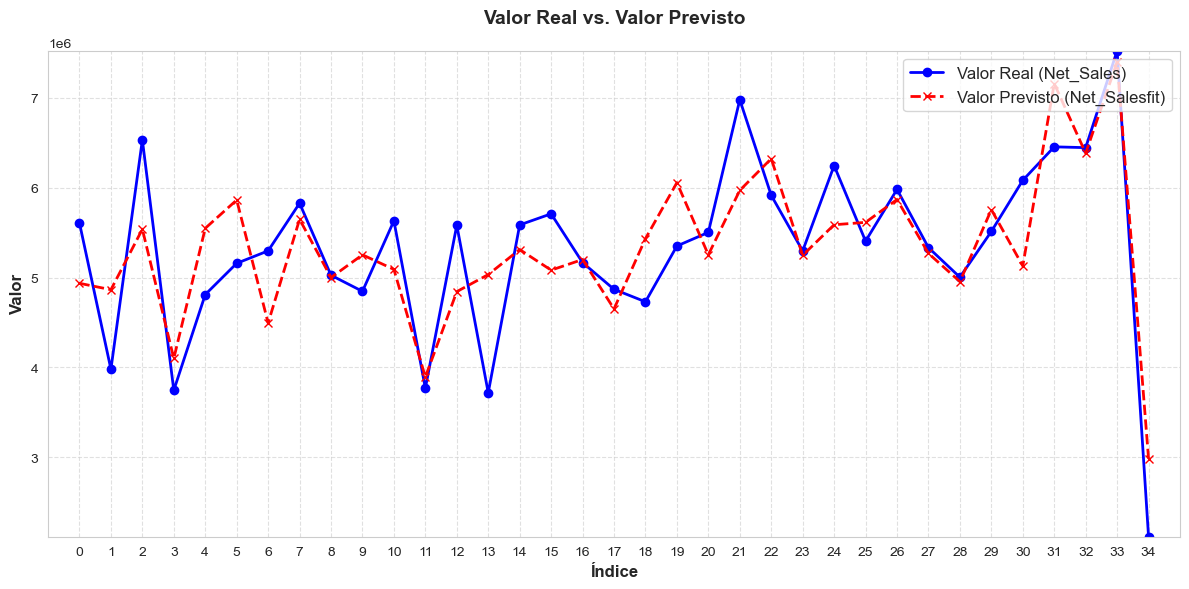

In [206]:
# Dados
indice = data.index  # Índice das observações (0 a 34)
valores_reais = data['Net_Sales']
valores_previstos = data['Net_Salesfit']

# Configurações do estilo
sns.set_style("whitegrid")  # Fundo com grade
plt.figure(figsize=(12, 6))  # Tamanho da figura

# Criando o gráfico de linhas
plt.plot(indice, valores_reais, color='blue', marker='o', linestyle='-', linewidth=2, label='Valor Real (Net_Sales)')
plt.plot(indice, valores_previstos, color='red', marker='x', linestyle='--', linewidth=2, label='Valor Previsto (Net_Salesfit)')

# Adicionando rótulos e título
plt.xlabel('Índice', fontsize=12, fontweight='bold')
plt.ylabel('Valor', fontsize=12, fontweight='bold')
plt.title('Valor Real vs. Valor Previsto', fontsize=14, fontweight='bold', pad=20)

# Ajustando a legenda
plt.legend(loc='upper right', fontsize=12)

# Melhorando a escala dos eixos
plt.xticks(indice)  # Mostrar todos os índices no eixo X
plt.xlim(-1, len(indice))  # Ajustar limites do eixo X
plt.ylim(min(valores_reais.min(), valores_previstos.min()), max(valores_reais.max(), valores_previstos.max()))  # Ajustar limites do eixo Y

# Adicionando uma grade suave
plt.grid(True, linestyle='--', alpha=0.6)

# Exibindo o gráfico
plt.tight_layout()  # Ajusta o layout para evitar cortes
plt.show()

In [207]:
data = pd.DataFrame({
    'Net_Orders': [50, 70, 60, 80, 90],
    'Customer_Potential': [200, 250, 220, 300, 280],
    'Customer_Target': [150, 180, 160, 200, 190],
    'Net_Sales': [100, 200, 150, 250, 220],
    'Net_Salesfit': [110, 210, 160, 240, 230]  # Valores ajustados
})

# Dados do DataFrame
x = data['Net_Orders']  # Eixo X: Net_Orders
y = data['Customer_Potential']  # Eixo Y: Customer_Potential
z = data['Net_Sales']  # Eixo Z: Net_Sales (valores reais)
z_fitted = data['Net_Salesfit']  # Eixo Z: Valores ajustados (Net_Salesfit)

# Criando o gráfico 3D com os valores reais (scatter)
trace = go.Scatter3d(
    x=x,  # Eixo X: Net_Orders
    y=y,  # Eixo Y: Customer_Potential
    z=z,  # Eixo Z: Net_Sales (valores reais)
    mode='markers',
    marker={
        'size': 10,
        'color': 'darkorchid',  # Cor dos pontos
        'opacity': 0.7,  # Transparência dos pontos
    },
    name='Valores Reais'  # Legenda para os pontos
)

# Layout do gráfico
layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},  # Margens
    width=800,  # Largura do gráfico
    height=800,  # Altura do gráfico
    plot_bgcolor='white',  # Cor de fundo do gráfico
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(200, 200, 200)',  # Cor da grade do eixo X
            backgroundcolor='whitesmoke'  # Cor de fundo do eixo X
        ),
        yaxis=dict(
            gridcolor='rgb(200, 200, 200)',  # Cor da grade do eixo Y
            backgroundcolor='whitesmoke'  # Cor de fundo do eixo Y
        ),
        zaxis=dict(
            gridcolor='rgb(200, 200, 200)',  # Cor da grade do eixo Z
            backgroundcolor='whitesmoke'  # Cor de fundo do eixo Z
        )
    )
)

# Criando a figura
plot_figure = go.Figure(data=[trace], layout=layout)

# Adicionando a superfície dos valores ajustados
plot_figure.add_trace(go.Mesh3d(
    x=data['Net_Orders'],  # Eixo X: Net_Orders
    y=data['Customer_Potential'],  # Eixo Y: Customer_Potential
    z=data['Net_Salesfit'],  # Eixo Z: Valores ajustados (Net_Salesfit)
    opacity=0.5,  # Transparência da superfície
    color='orange',  # Cor da superfície
    name='Valores Ajustados'  # Legenda para a superfície
))

# Atualizando os títulos dos eixos
plot_figure.update_layout(scene=dict(
    xaxis_title='Net Orders',  # Título do eixo X
    yaxis_title='Customer Potential',  # Título do eixo Y
    zaxis_title='Net Sales'  # Título do eixo Z
))

# Salvando o gráfico em um arquivo HTML
plot_figure.write_html('Net_Sales_scatter3D_fitted.html')

# Abrindo o gráfico no navegador
import webbrowser
webbrowser.open('Net_Sales_scatter3D_fitted.html')

True

# O problema da Multicolinearidade nos Modelos de Regressão

A multicolinearidade é um fenômeno que ocorre em modelos de regressão quando duas ou mais variáveis independentes (ou explicativas) estão altamente correlacionadas entre si. Isso significa que essas variáveis contêm informações redundantes ou superpostas, o que pode causar problemas na estimação dos coeficientes do modelo.

#### O que a multicolinearidade causa?
Instabilidade nas estimativas dos coeficientes:

Quando há multicolinearidade, os coeficientes da regressão podem variar muito com pequenas mudanças nos dados, tornando as estimativas pouco confiáveis.

Isso acontece porque o modelo tem dificuldade em separar o efeito individual de cada variável, já que elas estão correlacionadas.

#### Aumento do erro padrão dos coeficientes

A multicolinearidade infla o erro padrão das estimativas dos coeficientes, o que pode levar a valores-p maiores e, consequentemente, à conclusão de que as variáveis não são significativas, mesmo que elas sejam importantes.

#### Dificuldade de interpretação

Como as variáveis estão correlacionadas, fica difícil interpretar o efeito individual de cada uma delas sobre a variável dependente.

## Como identificar a multicolinearidade?

#### Número de Condição (Condition Number)

No nosso resultado, o Condition Number foi 2.63e+08, que é extremamente alto. Valores acima de 100 geralmente indicam problemas de multicolinearidade.

#### Fator de Inflação da Variância (VIF)

O VIF mede o quanto a variância de um coeficiente é inflada devido à multicolinearidade. Se um VIF calculado for maior que 5 ou 10 indica multicolinearidade significativa.


#### Matriz de Correlação

Analisar a matriz de correlação entre as variáveis independentes pode ajudar a identificar correlações fortes (geralmente acima de 0.7 ou 0.8).

## Impacto da Multicolinearidade

### Instabilidade nas estimativas

Os coeficientes do modelo podem variar muito com pequenas mudanças nos dados, tornando as estimativas pouco confiáveis.

### Dificuldade de interpretação

Fica difícil separar o efeito individual de cada variável, já que elas estão correlacionadas.

### Inflação do erro padrão

O erro padrão dos coeficientes aumenta, o que pode levar à insignificância estatística de variáveis que são, na verdade, importantes.

## Como lidar com a multicolinearidade?

#### Remover variáveis correlacionadas

Se duas variáveis estão altamente correlacionadas, podemos remover uma delas do modelo. No nosso caso, Customer_Potential e Customer_Target podem estar correlacionadas. Remover uma delas pode ajudar.

#### Combinação de variáveis

Se as variáveis correlacionadas representam conceitos semelhantes, pode-se combiná-las em uma única variável (por exemplo, criando uma média ponderada).

#### Análise de Componentes Principais (PCA)

O PCA transforma as variáveis correlacionadas em um conjunto menor de variáveis não correlacionadas (componentes principais), que podem ser usadas no modelo.

#### Regularização (Ridge ou Lasso)

Técnicas de regularização, como regressão Ridge ou Lasso, podem ser usadas para reduzir o impacto da multicolinearidade, penalizando coeficientes grandes.

#### Aumentar o tamanho da amostra

Em alguns casos, aumentar o número de observações pode ajudar a reduzir os efeitos da multicolinearidade.

# Exemplo prático no nosso caso

No nosso modelo, o Condition Number é muito alto, o que sugere multicolinearidade. Para confirmar, podemos:

1.Calcular a matriz de correlação entre Net_Orders, Customer_Potential e Customer_Target.

2.Calcular o VIF para cada variável.

3.Se a multicolinearidade for confirmada:

- Remover Customer_Potential ou Customer_Target, já que ambas não são significativas no modelo.

- Usar técnicas como PCA ou regularização para lidar com o problema.

## Passo 1: Matriz de Correlação de Pearson

A matriz de correlação de Pearson é usada para medir a relação linear entre pares de variáveis. No contexto de um modelo de regressão, é comum calcular a matriz de correlação apenas entre as variáveis independentes (ou explicativas) para verificar a multicolinearidade, que é a correlação entre as variáveis que explicam o modelo.

No nosso caso, Net_Sales é a variável dependente (y), e as outras variáveis (Net_Orders, Customer_Potential, Customer_Target) são as variáveis independentes (X). 

A multicolinearidade é um problema que ocorre entre as variáveis independentes, e não entre a variável dependente e as independentes. Por isso, Net_Sales não é incluída na matriz de correlação que calculamos.

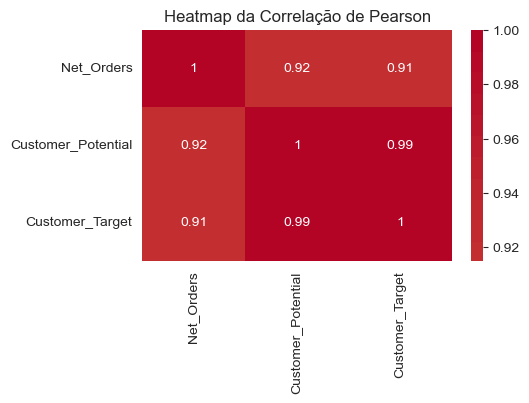

In [208]:
X = data[['Net_Orders', 'Customer_Potential', 'Customer_Target']]

correl_pearson2 = X.corr(method='pearson')

# Define o tamanho da figura
plt.figure(figsize=(5, 3))

# Cria o heatmap
sns.heatmap(correl_pearson2, annot=True, cmap='coolwarm', center=0)

# Configurações adicionais
plt.title('Heatmap da Correlação de Pearson')
plt.show()

### Interpretação

Customer_Potential e Customer_Target têm uma correlação muito alta (0.987), o que indica que elas estão praticamente medindo a mesma coisa. Isso é um forte indício de multicolinearidade.

Net_Orders não está altamente correlacionado com as outras variáveis.

## Passo 2: Fator de Inflação da Variância (VIF)

O VIF mede o quanto a variância de um coeficiente é inflada devido à multicolinearidade. 

Um VIF maior que 5 ou 10 indica multicolinearidade significativa.

In [209]:
# Cálculo do VIF
vif_data = pd.DataFrame()
vif_data["Variável"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF:\n", vif_data)


VIF:
              Variável          VIF
0          Net_Orders   164.170967
1  Customer_Potential  1072.282591
2     Customer_Target   639.457089


### Interpretação dos Valores de VIF

#### Net_Orders: VIF = 164.17

Isso significa que a variância do coeficiente de Net_Orders é inflada em 164 vezes devido à multicolinearidade. Um VIF tão alto sugere que Net_Orders está altamente correlacionada com outras variáveis no modelo.

#### Customer_Potential: VIF = 1072.28

Esse valor extremamente alto indica que a variância do coeficiente de Customer_Potential é inflada em 1072 vezes devido à multicolinearidade. Isso confirma que Customer_Potential está altamente correlacionada com outras variáveis.

#### Customer_Target: VIF = 639.46

Esse valor também é muito alto, indicando que a variância do coeficiente de Customer_Target é inflada em 639 vezes devido à multicolinearidade.

### O que esses valores significam?
VIF > 10: Indica multicolinearidade significativa.

VIF > 100: Indica multicolinearidade severa.

No nosso caso, todos os VIFs estão muito acima de 10, o que confirma a presença de multicolinearidade severa entre as variáveis Net_Orders, Customer_Potential e Customer_Target.

# O que fazer agora?

## 1. Remover uma das variáveis correlacionadas
Como Customer_Potential e Customer_Target estão altamente correlacionadas, podemos remover uma delas. Escolhemos a variável que possa ser menos relevante para o modelo ou que tiver menor significância estatística.

No nosso caso, como ambas não são significativas, podemos testar removendo Customer_Potential.

In [237]:
data2 = pd.read_excel('Reg_Linear.xlsx')

data2 = data2[['Net Sales', 'Net Orders','Customer Target']]
pd.concat([data2.head(), data2.tail()])

,Net Sales,Net Orders,Customer Target
0,5607559.87,4903954.57,5.602794e+06
1,3979663.88,4805091.16,5.602794e+06
2,6532058.84,5738798.39,5.602794e+06
3,3745516.30,3743791.15,5.602794e+06
4,4810833.68,5753273.61,5.602794e+06
30,6082514.76,4912746.59,6.204207e+06
31,6455203.02,7727904.20,6.204207e+06
32,6446105.83,6653337.15,6.204207e+06
33,7524347.16,8061422.26,6.204207e+06
34,2115554.81,1937834.15,6.204207e+06


### Separação entre Variáveis Independentes e Dependentes:

Normalmente, em um modelo de regressão, separamos as variáveis independentes (X) da variável dependente (Y).

Se nosso novo dataframe(data2) contiver todas as colunas (incluindo a variável dependente), adicionar uma constante diretamente a data2 pode não ser o ideal, pois a constante deve ser adicionada apenas às variáveis independentes.

#### Nomeação das Variáveis

Para evitar confusão, é uma boa prática separar as variáveis independentes (X) e a variável dependente (Y) em DataFrames ou arrays diferentes.

In [238]:
# Selecionar as variáveis independentes e dependente
X = data2[['Net Orders', 'Customer Target']]  # Variáveis independentes
y = data2['Net Sales']  # Variável dependente

## 2. Adicionar uma Constante (Intercepto)

O intercepto (também chamado de constante) é o valor da variável dependente (
Y) quando todas as variáveis independentes (
X) são iguais a zero.

É o ponto onde a linha de regressão cruza o eixo 
Y.

Na equação de regressão linear:

Y=
β 
0
​
 +β 
1
​
 X 
1
​
 +β 
2
​
 X 
2
​
 +⋯+β 
n
​
 X 
n
​
 +ϵ
 
β
0
​
  é o intercepto.

β
1
,
β
2
,
…
,
β
n
β 
1
​
 ,β 
2
​
 ,…,βn
 
​
  são os coeficientes das variáveis independentes.

ϵ é o termo de erro.

### Por que Adicionar uma Constante?

#### Inclusão do Intercepto

O intercepto é uma parte essencial do modelo de regressão. Sem ele, o modelo seria forçado a passar pela origem (Y=0) quando todas as (X=0).

Ou seja, ele permite que a linha de regressão não seja forçada a passar pela origem (Y=0) quando todas as (X=0).

Isso é importante porque, na maioria dos casos, o valor de Y não é zero quando todas as variáveis independentes são zero.

#### Flexibilidade do Modelo

Adicionar uma constante permite que o modelo se ajuste melhor aos dados, capturando o valor de Y quando todas as variáveis independentes são zero.

#### Interpretação dos Coeficientes

O intercepto ajuda a interpretar os coeficientes das variáveis independentes. Por exemplo, se o intercepto for significativo, ele representa o valor esperado de Y quando todas as variáveis independentes são zero.

#### Ajuste do Modelo

Sem o intercepto, o modelo pode ter um ajuste inadequado, especialmente se os dados não passarem pela origem.

### O que Acontece se Não Incluir o Intercepto?

Se você não incluir o intercepto, o modelo será ajustado sem intercepto, ou seja, a linha de regressão será forçada a passar pela origem (Y=0) quando todas as (X=0). 

Isso pode levar a:

#### Ajuste Inadequado

O modelo pode não se ajustar bem aos dados, especialmente se o valor de Y não for zero quando todas as X são zero.

#### Interpretação Incorreta

Os coeficientes das variáveis independentes podem ser interpretados de forma errada, pois o modelo não considera o intercepto.

### Resumo

O intercepto é essencial para que o modelo de regressão não seja forçado a passar pela origem.

Ele permite que o modelo se ajuste melhor aos dados e facilita a interpretação dos coeficientes.

In [239]:
# Adicionar uma constante (intercepto) ao modelo
X = sm.add_constant(X)
pd.concat([X.head(), X.tail()])

,const,Net Orders,Customer Target
0,1.0,4903954.57,5.602794e+06
1,1.0,4805091.16,5.602794e+06
2,1.0,5738798.39,5.602794e+06
3,1.0,3743791.15,5.602794e+06
4,1.0,5753273.61,5.602794e+06
30,1.0,4912746.59,6.204207e+06
31,1.0,7727904.20,6.204207e+06
32,1.0,6653337.15,6.204207e+06
33,1.0,8061422.26,6.204207e+06
34,1.0,1937834.15,6.204207e+06


# 3. Cálculo do VIF para identificar Multicolinearidade 

In [240]:
# Calcular o VIF para cada variável independente
vif = pd.DataFrame()
vif["Variável"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("VIF das variáveis independentes:")
print(vif)


VIF das variáveis independentes:
          Variável         VIF
0            const  249.820393
1       Net Orders    1.008634
2  Customer Target    1.008634


## Interpretação dos Valores de VIF

#### const (Intercepto): VIF = 249.82

O VIF alto para o intercepto é esperado e não é um problema. O intercepto é uma constante adicionada ao modelo para capturar o valor da variável dependente (Y) quando todas as variáveis independentes (X) são zero. Ele não está correlacionado com outras variáveis, então o VIF alto para o intercepto pode ser ignorado pois ele não afeta a interpretação das outras variáveis.

#### Net Orders: VIF = 1.008634

Um VIF de 1.008634 indica que não há multicolinearidade entre Net Orders e as outras variáveis independentes. Isso significa que Net Orders é praticamente independente das outras variáveis no modelo.

#### Customer Target: VIF = 1.008634

Assim como Net Orders, Customer Target também tem um VIF de 1.008634, indicando que não há multicolinearidade entre essa variável e as outras variáveis independentes.

### O Que Isso Significa?

#### Multicolinearidade Ausente
Os valores de VIF para Net Orders e Customer Target estão muito próximos de 1, o que indica que não há correlação significativa entre essas variáveis. Isso é ótimo, pois significa que cada variável independente contribui de forma única para explicar a variável dependente (Net Sales).

### Conclusão

Multicolinearidade não é um problema.

Com VIFs tão baixos para Net Orders e Customer Target, podemos prosseguir com o modelo de regressão sem se preocupar com multicolinearidade.

# 4. Criando um novo Modelo (sem considerar a variável Customer_Potential)

In [241]:
# Ajustar o modelo de regressão linear
modelo = sm.OLS(y, X).fit()

# Exibir o resumo do modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:              Net Sales   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     29.96
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           4.66e-08
Time:                        18:04:11   Log-Likelihood:                -514.97
No. Observations:                  35   AIC:                             1036.
Df Residuals:                      32   BIC:                             1041.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.637e+05   1.66e+06     

## Resumo do Modelo 2

#### R² = 0,652
O modelo explica 65,2% da variabilidade da variável dependente (Net Sales). Isso indica que o modelo tem um poder explicativo moderado.

### Teste F e Significância Geral

#### F-statistic = 29,96 e Prob (F-statistic) = 4.66e-08

O teste F avalia a significância geral do modelo. Um valor-p muito baixo (praticamente zero) indica que o modelo é estatisticamente significativo.

### Intercepto (const)

#### Coeficiente = 2.637e+05
Quando Net Orders e Customer Target são zero, o valor esperado de Net Sales é 263.700. No entanto, o valor-p de 0,875 indica que o intercepto não é estatisticamente significativo (p > 0,05). Isso pode sugerir que o intercepto não é relevante no contexto do problema.

#### Intervalo de Confiança
O intervalo de confiança para o intercepto é muito amplo (-3.12e+06 a 3.64e+06), o que reforça a falta de significância.

### Net Orders

#### Coeficiente = 0,7276
Para cada aumento unitário em Net Orders, Net Sales aumenta em 0,7276 unidades, mantendo Customer Target constante.

#### Valor-p = 0,000
O coeficiente é altamente significativo (p < 0,05), indicando que Net Orders tem um impacto forte e estatisticamente significativo sobre Net Sales.

### Customer Target

#### Coeficiente = 0,2047
Para cada aumento unitário em Customer Target, Net Sales aumenta em 0,2047 unidades, mantendo Net Orders constante.

#### Valor-p = 0,478
O coeficiente não é estatisticamente significativo (p > 0,05). Isso sugere que Customer Target pode não ter um impacto significativo sobre Net Sales.

# Conclusões e Recomendações

#### Ajuste do Modelo:

O modelo tem um bom ajuste (R² = 0,652) e é estatisticamente significativo (p = 4.66e-08).

O modelo explica 65,2% da variabilidade da variável dependente (Net Sales). Isso indica que o modelo tem um poder explicativo moderado.

#### Significância das Variáveis:

Net Orders tem um impacto forte e significativo sobre Net Sales.

Customer Target não é estatisticamente significativo e pode ser removido do modelo.

Podemos remover Customer Target também e ajustar o modelo novamente com apenas Net Orders.

# Criando um terceiro modelo apeas com Net_Orders (x) sendo a preditora de Net_Sales (Y)

In [243]:
# Carregar o arquivo Excel
data3 = pd.read_excel('Reg_Linear.xlsx')

# Selecionar as variáveis relevantes (Net Sales e Net Orders)
data3 = data3[['Net Sales', 'Net Orders']]

# Exibir as primeiras e últimas linhas do DataFrame
print("Dados selecionados:")
print(pd.concat([data3.head(), data3.tail()]))

# Separar variáveis independentes (X) e dependente (y)
X1 = data3['Net Orders']  # Variável independente
y1 = data3['Net Sales']   # Variável dependente

# Adicionar uma constante (intercepto) ao modelo
X1 = sm.add_constant(X1)

# Exibir as primeiras e últimas linhas de X (com a constante)
print("\nVariáveis independentes (com constante):")
print(pd.concat([X1.head(), X1.tail()]))

# Ajustar o modelo de regressão linear
modelo3 = sm.OLS(y1, X1).fit()

# Exibir o resumo do modelo
print("\nResumo do Modelo de Regressão Linear:")
print(modelo3.summary())

Dados selecionados:
     Net Sales  Net Orders
0   5607559.87  4903954.57
1   3979663.88  4805091.16
2   6532058.84  5738798.39
3   3745516.30  3743791.15
4   4810833.68  5753273.61
30  6082514.76  4912746.59
31  6455203.02  7727904.20
32  6446105.83  6653337.15
33  7524347.16  8061422.26
34  2115554.81  1937834.15

Variáveis independentes (com constante):
    const  Net Orders
0     1.0  4903954.57
1     1.0  4805091.16
2     1.0  5738798.39
3     1.0  3743791.15
4     1.0  5753273.61
30    1.0  4912746.59
31    1.0  7727904.20
32    1.0  6653337.15
33    1.0  8061422.26
34    1.0  1937834.15

Resumo do Modelo de Regressão Linear:
                            OLS Regression Results                            
Dep. Variable:              Net Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     60.28
Date:                Tue, 04 Mar 2025   Prob

In [244]:
# Substituir espaços nos nomes das colunas para evitar erros
data3.columns = data3.columns.str.replace(" ", "_")

# Estimando o modelo de regressão múltipla
modelo3 = sm.OLS.from_formula("Net_Sales ~ Net_Orders", data3).fit()

# Exibir resumo do modelo
print(modelo3.summary())

                            OLS Regression Results                            
Dep. Variable:              Net_Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     60.28
Date:                Tue, 04 Mar 2025   Prob (F-statistic):           6.04e-09
Time:                        18:26:21   Log-Likelihood:                -515.25
No. Observations:                  35   AIC:                             1034.
Df Residuals:                      33   BIC:                             1038.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.394e+06   5.18e+05      2.691      0.0

# Resumo dos resultados do Modelo de Regressão

#### R² = 0,646

Significa que 64,6% da variabilidade em Net Sales é explicada por Net Orders.

Os 35,4% restantes são atribuídos a outros fatores não incluídos no modelo.

#### Margem de Erro

O R² não representa uma margem de erro de 35,4% para mais ou para menos.

A "margem de erro" pode ser calculada para os coeficientes ou para as previsões, usando o erro padrão dos resíduos ou intervalos de confiança.

#### Próximos Passos

Calcular o erro padrão dos resíduos (RMSE) para entender a dispersão dos resíduos.

Calcular intervalos de previsão para entender a incerteza associada às previsões do modelo

# RMSE

O RMSE (Root Mean Squared Error) é uma medida da dispersão dos resíduos (erros) em torno da linha de regressão. Ele indica o quão longe, em média, os valores observados estão dos valores previstos pelo modelo.

Por exemplo, se o RMSE for 500.000, isso significa que, em média, as previsões do modelo têm um erro de ±500.000 em relação aos valores reais de Net Sales.

In [245]:
# Calcular o RMSE
rmse = np.sqrt(modelo3.mse_resid)
print("Erro padrão dos resíduos (RMSE):", rmse)

Erro padrão dos resíduos (RMSE): 616544.0576963916


## Interpretações do RMSE

O valor do RMSE calculado foi de 616.544,06.

O RMSE de 616.544,06 significa que, em média, as previsões do modelo têm um erro de ±616.544,06 em relação aos valores reais de Net Sales.



## Calculando a Média de Net_Sales

### Por que calcular a média de Net Sales?

O RMSE é uma medida absoluta de erro. No nosso caso, o RMSE é 616.544,06, o que significa que, em média, o modelo erra ±616.544,06 em relação aos valores reais de Net Sales.

No entanto, um erro de 616.544,06 pode ser considerado alto ou baixo dependendo da escala dos dados. Por exemplo:

Se a média de Net Sales for 1.000.000, um erro de 616.544,06 é muito grande (61,65%).

Se a média de Net Sales for 10.000.000, um erro de 616.544,06 é relativamente pequeno (6,17%).

In [249]:
# Calcular a média de Net Sales
media_net_sales = data3['Net_Sales'].mean()
print("Média de Net Sales:", media_net_sales)

# RMSE (valor já calculado anteriormente)
rmse = 616544.06

# Calcular a margem de erro percentual
margem_erro_percentual = (rmse / media_net_sales) * 100
print("Margem de erro percentual:", margem_erro_percentual, "%")

Média de Net Sales: 5335699.764857143
Margem de erro percentual: 11.55507407033625 %


## Interpretando os resultados do RMSE

#### Média de Net Sales: 5.335.699,76

Isso significa que, em média, o valor de Net Sales no seu conjunto de dados é 5.335.699,76.

#### Margem de erro percentual: 11,56%

Isso indica que, em média, as previsões do modelo têm um erro de ±11,56% em relação aos valores reais de Net Sales.

### O Que isso significa na prática?

#### Precisão do Modelo:

Um erro de 11,56% indica que o modelo tem uma precisão razoável, mas ainda há espaço para melhorias.

#### Contexto do Negócio

Dependendo do contexto do negócio, um erro de 11,56% pode ser aceitável ou não. Por exemplo:

Se a margem de lucro for alta, um erro de 11,56% pode ser tolerável.

Se a margem de lucro for baixa, um erro de 11,56% pode ser problemático.

# Calculando os intervalos de Previsão

Esses intervalos fornecem uma faixa de valores dentro da qual o valor real de Net Sales deve cair, com um certo nível de confiança (geralmente 95%).


## Como os valores do Intervalo Inferior e Superior são calculados?

Os valores do intervalo inferior e intervalo superior foram calculados usando a função wls_prediction_std da biblioteca statsmodels. 

Essa função calcula os intervalos de previsão para cada observação com base no modelo de regressão linear ajustado.

### Detalhando:

#### O Que é um Intervalo de Previsão?
Um intervalo de previsão é uma faixa de valores dentro da qual o valor real da variável dependente (Y), no nosso caso, (Net Sales) deve cair, com um certo nível de confiança (geralmente 95%). 

Ele leva em conta tanto a incerteza do modelo quanto a variabilidade dos dados.

#### Como os Intervalos São Calculados?

A função wls_prediction_std calcula os intervalos de previsão usando a seguinte fórmula:

Intervalo de Previsão = 
y
^
±
t
α
/
2
,
n
−
p
⋅
SE
pred
Intervalo de Previs 
a
˜
 o= 
y
^
​
 ±t 
α/2,n−p
​
 ⋅SE 
pred
​
 
Onde:

y
^
​
 : Valor previsto pelo modelo para uma observação.

t 
α/2,n−p
​
 : Valor crítico da distribuição t de Student, que depende do nível de confiança (geralmente 95%) e dos graus de liberdade (
n
−
p
n−p, onde 
n
n é o número de observações e 
p
p é o número de parâmetros do modelo).

SE 
pred
​
 : Erro padrão da previsão, que leva em conta a incerteza do modelo e a variabilidade dos dados.


## Resumo
O cálculo dos intervalos de previsão é importante para entender a incerteza associada às previsões do modelo.

Ele ajuda a avaliar a qualidade do modelo, tomar decisões informadas e comunicar os resultados de forma clara.

No nosso caso, os intervalos de previsão mostram que o modelo está capturando bem a variabilidade dos dados, pois os valores reais de Net Sales estão dentro dos intervalos.

Eles fornecem uma faixa de valores dentro da qual o valor real de Net Sales deve cair, com 95% de confiança.



## Por que esse cálculo é Importante?

#### Avaliar a Incerteza das Previsões

Os intervalos de previsão ajudam a entender a incerteza associada às previsões do modelo. Em vez de fornecer apenas um valor previsto, o modelo fornece uma faixa de valores possíveis.

#### Tomada de Decisão

Com os intervalos de previsão, você pode tomar decisões mais informadas. Por exemplo:

Se o intervalo de previsão for muito amplo, isso indica que o modelo tem alta incerteza, e você pode precisar de mais dados ou de um modelo mais preciso.

Se o intervalo for estreito, isso indica que o modelo tem alta confiança nas previsões.

#### Verificar a Qualidade do Modelo

Se os valores reais de Net Sales estiverem consistentemente dentro dos intervalos de previsão, isso sugere que o modelo está bem ajustado.

Se muitos valores reais estiverem fora dos intervalos, isso pode indicar problemas no modelo, como subajuste ou superajuste.

#### Comunicação dos Resultados

Os intervalos de previsão são uma maneira clara de comunicar a incerteza associada às previsões do modelo para stakeholders ou tomadores de decisão.

In [253]:
# Calcular os intervalos de previsão
_, intervalo_inferior, intervalo_superior = wls_prediction_std(modelo3)

# Criar um DataFrame com as previsões e intervalos
previsoes = pd.DataFrame({
    'Net Orders': X1['Net Orders'],
    'Net Sales (Real)': y1,
    'Net Sales (Previsto)': modelo3.fittedvalues,
    'Intervalo Inferior': intervalo_inferior,
    'Intervalo Superior': intervalo_superior
})

# Exibir as primeiras linhas
display(previsoes.head())

,Net Orders,Net Sales (Real),Net Sales (Previsto),Intervalo Inferior,Intervalo Superior
0,4903954.57,5607559.87,4.993941e+06,3.718631e+06,6.269251e+06
1,4805091.16,3979663.88,4.921375e+06,3.644589e+06,6.198161e+06
2,5738798.39,6532058.84,5.606714e+06,4.332572e+06,6.880856e+06
3,3743791.15,3745516.30,4.142384e+06,2.832357e+06,5.452411e+06
4,5753273.61,4810833.68,5.617339e+06,4.343038e+06,6.891639e+06


## Interpretação dos Resultados dos Intervalos de Previsão


#### Net Sales (Real) vs. Net Sales (Previsto)

O modelo faz uma previsão para Net Sales com base em Net Orders. Por exemplo:

Para a primeira observação, o valor real de Net Sales é 5.607.559,87, e o valor previsto é 4.993.941.

Para a segunda observação, o valor real é 3.979.663,88, e o valor previsto é 4.921.375.

#### Intervalos de Previsão

Os intervalos de previsão fornecem uma faixa de valores dentro da qual o valor real de Net Sales deve cair, com 95% de confiança. Por exemplo:

Para a primeira observação, o intervalo de previsão é [3.718.631; 6.269.251]. Isso significa que há 95% de confiança de que o valor real de Net Sales estará nessa faixa.

#### Comparação entre Valores Reais e Intervalos

Observa-se que os valores reais de Net Sales estão dentro dos intervalos de previsão para todas as observações mostradas. Isso indica que o modelo está capturando bem a variabilidade dos dados.
